<a href="https://colab.research.google.com/github/feby-tw/comp-stat/blob/main/ta-1-no-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementasi Regesi Linear Berganda

## Step 1: Menyiapkan Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving data_dummy.csv to data_dummy.csv


In [ ]:
# Read dataset
df = pd.read_csv("data_dummy.csv", sep = ";")
print(df.head())
print(df.columns)

# Check missing values
print (df.isnull().sum())

  product_id category  reviews_count  rating     price  sales_volume  \
0       P001  Fashion          120.0     4.5  150000.0        1800.0   
1       P002  Fashion           80.0     4.2  175000.0        1350.0   
2       P003  Fashion           45.0     3.8  120000.0         800.0   
3       P004  Fashion          200.0     4.7  200000.0        2500.0   
4       P005  Fashion          150.0     4.4  160000.0        1900.0   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN          NaN          NaN   

   Unnamed: 12  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4      

In [ ]:
# Remove empty columns
df = df.dropna(axis=1, how='all')

# Remove empty rows related to the variables
df = df.dropna(subset = ["reviews_count", "rating", "sales_volume"])

# Convert data variables into numeric data type
df["reviews_count"] = pd.to_numeric(df["reviews_count"], errors = "coerce")
df["rating"] = pd.to_numeric(df["rating"], errors = "coerce")
df["sales_volume"] = pd.to_numeric(df["sales_volume"], errors = "coerce")

# Read clean dataset
print(df.head())
print(df.columns)
print(df.dtypes)

  product_id category  reviews_count  rating     price  sales_volume
0       P001  Fashion          120.0     4.5  150000.0        1800.0
1       P002  Fashion           80.0     4.2  175000.0        1350.0
2       P003  Fashion           45.0     3.8  120000.0         800.0
3       P004  Fashion          200.0     4.7  200000.0        2500.0
4       P005  Fashion          150.0     4.4  160000.0        1900.0
Index(['product_id', 'category', 'reviews_count', 'rating', 'price',
       'sales_volume'],
      dtype='object')
product_id        object
category          object
reviews_count    float64
rating           float64
price            float64
sales_volume     float64
dtype: object


## Step 2: Membentuk Model Regresi

Formula: Y=a+b1​X1​+b2​X2​

di mana:

*   X1 = reviews_count
*   X2 = rating
*   Y = sales_volume
*   a = intercept
*   b1, b2 = regression coefficient

In [ ]:
# Define variables

## Variable dependent (predictors)
X = df[["reviews_count", "rating"]]

## Variable independent (target)
Y = df["sales_volume"]

## Step 3: Menerapkan Model Regresi

### Penerapan Model dengan Statsmodels (OLS)

In [ ]:
# Add intercept (constant)
X_sm = sm.add_constant(X)

# Fit model OLS
model = sm.OLS(Y, X_sm).fit()

# Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           sales_volume   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     630.0
Date:                Mon, 15 Sep 2025   Prob (F-statistic):           1.36e-39
Time:                        15:46:03   Log-Likelihood:                -415.92
No. Observations:                  60   AIC:                             837.8
Df Residuals:                      57   BIC:                             844.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           169.5575    636.082      0.267

### Menggunakan Scikit-Learn

In [ ]:
reg = LinearRegression()
reg.fit(X, Y)

print("intercept (β0):", reg.intercept_)
print("Koefisien (β1 reviews_count, β2 rating):", reg.coef_)

intercept (β0): 169.55747654968263
Koefisien (β1 reviews_count, β2 rating): [ 15.04171283 -64.38336276]


## Memprediksi data baru

In [ ]:
new_data = np.array([[300, 4.5]])
predicted_sales = reg.predict(new_data)
print("Prediksi Volume Penjualan:", predicted_sales[0])

Prediksi Volume Penjualan: 4392.346193790052


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Visualisasi Aktual vs Prediksi

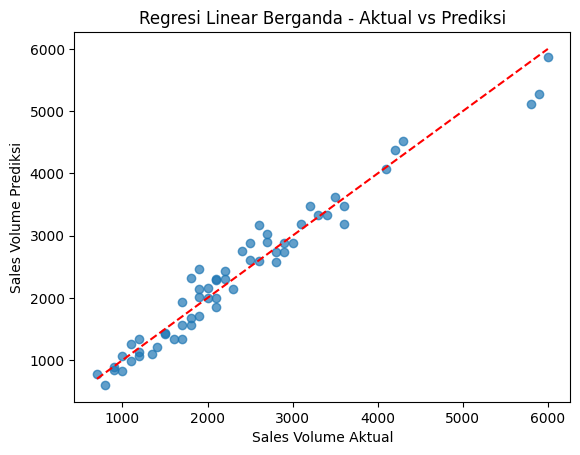

In [ ]:
import matplotlib.pyplot as plt

# Prediksi untuk seluruh dataset
Y_pred = reg.predict(X)

plt.scatter(Y, Y_pred, alpha = 0.7)
plt.xlabel("Sales Volume Aktual")
plt.ylabel("Sales Volume Prediksi")
plt.title("Regresi Linear Berganda - Aktual vs Prediksi")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')   # garis ideal
plt.show()